<a href="https://colab.research.google.com/github/rksiitd1/Colab-notebooks/blob/main/BBL736_Assignment_1%262_Laxman_Manjhi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laxman Manjhi
### 2019BB10034

To solve this problem, we will first write the code for the deterministic version of the system using the RK4 algorithm, and then we will write the code for the stochastic version of the system using the Gillespie algorithm. Finally, we will plot the time series for both versions and compare the results.

### Step 1: Importing necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Step 2: Defining the rescaled version of the auto-activator system

In [ ]:
def auto_activator_system(p, alpha, n):
    return alpha * p**n / (1 + p**n) - p

### Step 3: Implementing the RK4 algorithm

In [ ]:
def rk4(p0, alpha, n, t_end, dt):
    p = np.zeros(int(t_end/dt) + 1)
    p[0] = p0

    for i in range(int(t_end/dt)):
        k1 = auto_activator_system(p[i], alpha, n)
        k2 = auto_activator_system(p[i] + 0.5 * dt * k1, alpha, n)
        k3 = auto_activator_system(p[i] + 0.5 * dt * k2, alpha, n)
        k4 = auto_activator_system(p[i] + dt * k3, alpha, n)

        p[i+1] = p[i] + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)

    return p

### Step 4: Implementing the Gillespie algorithm

In [ ]:
def gillespie(p0, alpha, n, t_end, dt, tau):
    p = np.zeros(int(t_end/dt) + 1)
    p[0] = p0

    for i in range(int(t_end/dt)):
        alpha_p = alpha * p[i]**n / (1 + p[i]**n)
        alpha_1 = 1 / (1 + p[i]**n)

        tau_p = 1 / (alpha_p + alpha_1)
        tau_1 = 1 / alpha_1

        tau_sample = np.random.exponential(tau)
        tau_sample = min(tau_sample, t_end - i * dt)

        if tau_sample <= tau_p:
            p[i+1] = p[i] + tau_sample * alpha_p
        else:
            p[i+1] = p[i] - tau_sample * alpha_1

    return p

### Step 5: The parameters and initial conditions

In [ ]:
alpha = 3
n = 2
p0s = [0.1, 1.0, 2.0]
t_end = 10.01
dt = 0.00999
tau = 1

### Step 6: Ploting the time series for the deterministic version

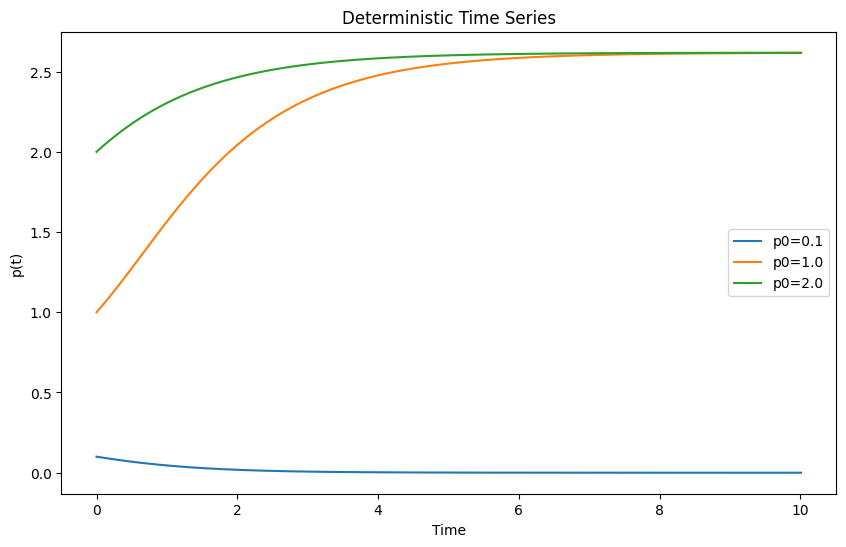

In [ ]:
plt.figure(figsize=(10, 6))
for p0 in p0s:
    p = rk4(p0, alpha, n, t_end, dt)
    plt.plot(np.arange(0, t_end, dt), p, label=f'p0={p0}')

plt.xlabel('Time')
plt.ylabel('p(t)')
plt.title('Deterministic Time Series')
plt.legend()
plt.show()

### Step 7: Ploting the time series for the stochastic version

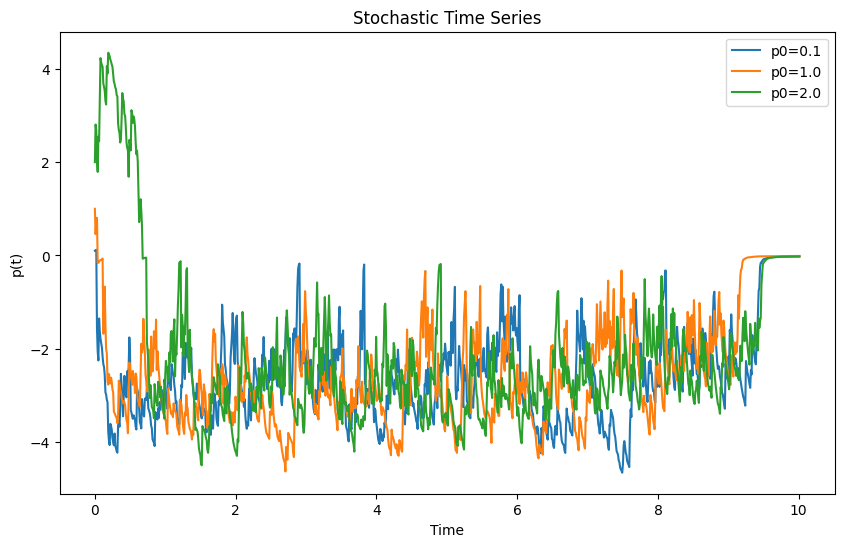

In [ ]:
plt.figure(figsize=(10, 6))
for p0 in p0s:
    p = gillespie(p0, alpha, n, t_end, dt, tau)
    plt.plot(np.arange(0, t_end, dt), p, label=f'p0={p0}')

plt.xlabel('Time')
plt.ylabel('p(t)')
plt.title('Stochastic Time Series')
plt.legend()
plt.show()